In [123]:
import pandas as pd
import numpy as np
import datetime as datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('C:/Users/ramil/Documents/UBA/(75.06) Organización de Datos/TPS/TP1/Entrenamieto_ECI_2020.csv')


# Densidad del precio

In [143]:
densidad = df[['Price', 'Currency']]
densidad = densidad.loc[densidad['Price'] != 'None']
densidad = densidad.loc[densidad['Price'] != 'Other']
densidad['Price'] = pd.to_numeric(densidad['Price'])

In [154]:
densidad_usd = densidad['Price'].loc[densidad['Currency'] == 'USD']
densidad_eur = densidad['Price'].loc[densidad['Currency'] == 'EUR']

In [166]:
densidad_usd = densidad_usd.to_frame()
densidad_eur = densidad_eur.to_frame()
densidad_usd = densidad_usd.rename(columns={'Price':'Precio(USD)'})
densidad_eur = densidad_eur.rename(columns={'Price':'Precio(EUR)'})

[Text(0, 0.5, 'Distribución'), Text(0.5, 0, 'Precio')]

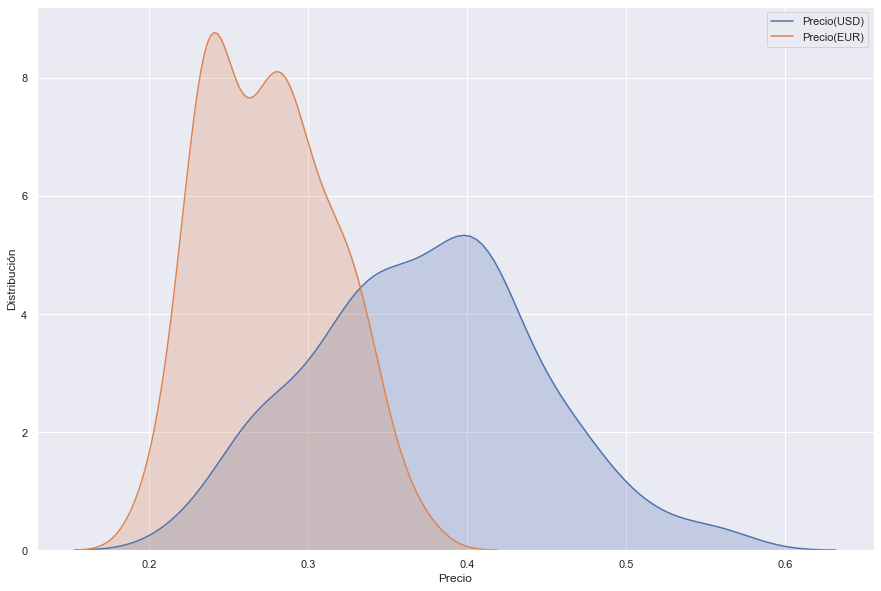

In [169]:
ax = sns.kdeplot(data=densidad_usd['Precio(USD)'], shade=True)
ax = sns.kdeplot(data=densidad_eur['Precio(EUR)'], shade=True)
ax.set(xlabel = 'Precio', ylabel = 'Distribución')

# Cuatrimestre con más oportunidades exitosas

Toma en cuenta los cuatrimestres de los 4 años que aparecen en el data set

In [37]:
cuatrimestres = df[['Delivery_Quarter', 'Stage']]
cuatrimestres = cuatrimestres.loc[cuatrimestres['Stage'] == 'Closed Won']
cuatrimestres

,Delivery_Quarter,Stage
1,Q1,Closed Won
2,Q1,Closed Won
7,Q1,Closed Won
23,Q1,Closed Won
63,Q1,Closed Won
...,...,...
16937,Q1,Closed Won
16939,Q2,Closed Won
16942,Q1,Closed Won
16943,Q2,Closed Won


[Text(0, 0.5, 'Cuatrimestre'), Text(0.5, 0, 'Cantidad')]

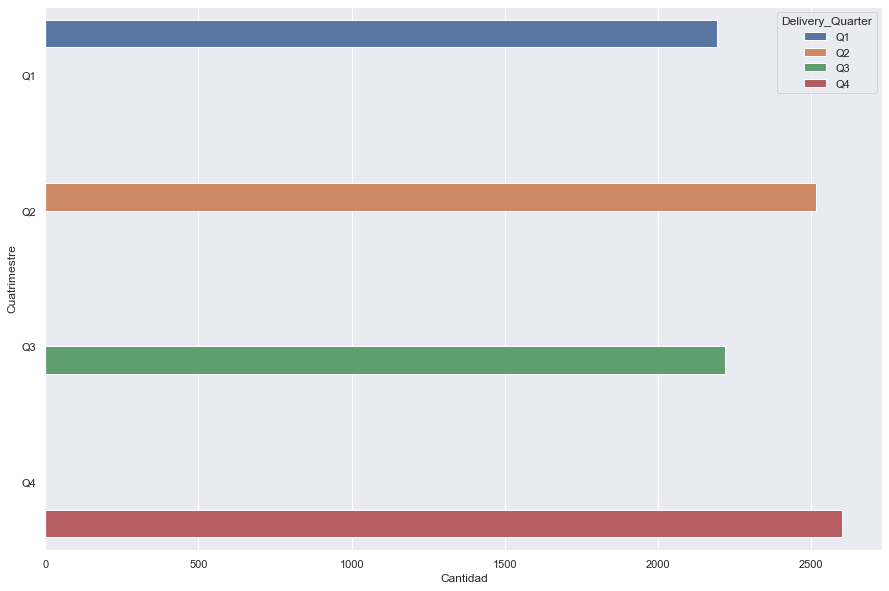

In [50]:
plt.rcParams['figure.figsize'] = (15, 10)
g = sns.countplot(y = 'Delivery_Quarter', data = cuatrimestres, hue = 'Delivery_Quarter')
g.set(xlabel = 'Cantidad', ylabel = 'Cuatrimestre')